In [1]:
# 导入相关模块
from math import sin,cos
import numpy as np
import random
import cmath

import matplotlib.pyplot as plt
from math import sqrt
from math import atan2

from numpy import *
from scipy import optimize
import functools
from matplotlib import pyplot as p, cm, colors


# 本文使用的编程语言和各个库的版本号如下：
# python ： 3.7.4
# numpy  :  1.21.4
# matplotlib : 3.1.1
# Anaconda  :3._x以上


In [2]:
from math import sin,cos
# 极坐标转换为笛卡尔坐标
a = [100,98,112,105,98,112,105,98,112]
b = [0,40.10,80.21,119.75,159.86,199.96,240.07,280.17,320.28]
c = []

for i in b:
    s = (i/180)*np.pi
    c.append(i)

x = []
y = []
for i in range(9):
    length,angle = a[i],b[i]
    c,d = length*cos((angle/180)*np.pi),length*sin((angle/180)*np.pi)
    x.append(c)
    y.append(d)
    
print(x)
y

[100.0, 74.9622972900063, 19.044201170560154, -52.10273288589683, -92.00770214648452, -105.27229068983148, -52.38886563516713, 17.303800460438527, 86.14777204829524]


[0.0,
 63.12411571661589,
 110.36901015128855,
 91.16087552135996,
 33.74289178069639,
 -38.23277145219296,
 -90.99674036722637,
 -96.46024305186737,
 -71.57207116686621]

0 0

方法                             Xc         Yc         Rc   nb_calls    std(Ri)     residu    residu2
---------------------------------------------------------------------------------------------------
Fitting Circle           -1.11378    0.00051  104.44825         18   5.874913 310.631415 13763077.60


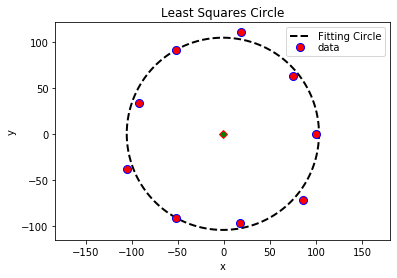

In [3]:
#    最小二乘法拟合圆
from numpy import *
from scipy import optimize
import functools
from matplotlib import pyplot as p, cm, colors


method_2  = "Fitting Circle"


x = x
y = y
basename = 'arc'

x = m
y = n
basename = 'arc'

# 质心坐标
x_m = 0
y_m = 0

print(x_m,y_m)

def countcalls(fn):    #修饰器：用于输出反馈
    "decorator function count function calls "

    @functools.wraps(fn)
    def wrapped(*args):
        wrapped.ncalls +=1
        return fn(*args)

    wrapped.ncalls = 0
    return wrapped

def calc_R(xc, yc):

    return sqrt((x - xc) ** 2 + (y - yc) ** 2)

def f_2(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

#  估计圆心
center_estimate = x_m, y_m
center_2, _ = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(xc_2, yc_2)
#  拟合圆的半径
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)
residu2_2  = sum((Ri_2**2-R_2**2)**2)
ncalls_2   = f_2.ncalls

#  输出
fmt = '%-22s %10.5f %10.5f %10.5f %10d %10.6f %10.6f %10.2f'
print (('\n%-22s' +' %10s'*7) % tuple('方法 Xc Yc Rc nb_calls std(Ri) residu residu2'.split()))
print('-'*(22 +7*(10+1)))
print(fmt % (method_2 , xc_2 , yc_2 , R_2 , ncalls_2 , Ri_2.std() , residu_2 , residu2_2 ))

#  画图
p.close('all')

def plot_all(residu2=False):

    p.figure(facecolor='white')  # figsize=(7, 5.4), dpi=72,
    p.axis('equal')

    theta_fit = linspace(-pi, pi, 180)

    x_fit2 = xc_2 + R_2 * cos(theta_fit)
    y_fit2 = yc_2 + R_2 * sin(theta_fit)
    p.plot(x_fit2, y_fit2, 'k--', label=method_2, lw=2)

    p.plot([xc_2], [yc_2], 'gD', mec='r', mew=1)

    
    p.xlabel('x')  # 添加x轴标签
    p.ylabel('y')  # 添加y轴标签


    p.plot(x, y, 'ro', label='data', ms=8, mec='b', mew=1) # 加入数据
    p.legend(loc='best', labelspacing=0.1)

    p.title('Least Squares Circle')   # 添加标题

    p.savefig('%s_residu%d.png' % (basename, 2 if residu2 else 1)) # 相对路径保存并添加名字

# plot_all(residu2=False)
plot_all(residu2=True )

p.show()

In [4]:
# 已知极坐标数据
data1 = [
    [0,0],
    [100,0],
    [98,40.10],
    [112,80.21],
    [105,119.75],
    [98,159.86],
    [112,199.96],
    [105,240.07],
    [98,280.17],
    [112,320.28]
]

# 无偏差位置极坐标
data2 = [
    [0,0],
    [100,0],
    [100,40],
    [100,80],
    [100,120],
    [100,160],
    [100,200],
    [100,240],
    [100,280],
    [100,320]
]

In [5]:
# 已知极坐标数据转换为笛卡尔坐标
data1_=[]
q = []

for i in data1:
    length,angle = i[0],i[1]
    x,y = length*cos((angle/180)*np.pi),length*sin((angle/180)*np.pi)
    q.append(x)
    q.append(y)
    data1_.append(q)
    q = []

data1_

[[0.0, 0.0],
 [100.0, 0.0],
 [74.9622972900063, 63.12411571661589],
 [19.044201170560154, 110.36901015128855],
 [-52.10273288589683, 91.16087552135996],
 [-92.00770214648452, 33.74289178069639],
 [-105.27229068983148, -38.23277145219296],
 [-52.38886563516713, -90.99674036722637],
 [17.303800460438527, -96.46024305186737],
 [86.14777204829524, -71.57207116686621]]

In [6]:
data2_=[]
q = []

for i in data2:
    length,angle = i[0],i[1]
    x,y = length*cos((angle/180)*np.pi),length*sin((angle/180)*np.pi)
    q.append(x)
    q.append(y)
    data2_.append(q)
    q = []

data2_

[[0.0, 0.0],
 [100.0, 0.0],
 [76.60444431189781, 64.27876096865393],
 [17.36481776669304, 98.4807753012208],
 [-49.99999999999998, 86.60254037844388],
 [-93.96926207859083, 34.20201433256689],
 [-93.96926207859084, -34.20201433256687],
 [-50.00000000000004, -86.60254037844385],
 [17.364817766692997, -98.48077530122082],
 [76.60444431189778, -64.27876096865396]]

In [7]:
# 定义函数，实现笛卡尔坐标转换为极坐标
def func_1(zuobiao):
    l = sqrt(zuobiao[0]**2+zuobiao[1]**2)
    x,y = zuobiao[0],zuobiao[1]
    angle = atan2(y,x)   # atan2 函数实现，接收一对笛卡尔坐标，返回对应弧度
    return l,angle

    

In [8]:
def func_2(zuobiao):
    # 返回角度
    a = list(cmath.polar(complex(zuobiao[0],zuobiao[1])))
    a[1] = a[1] * 180/np.pi
    if a[1]<0:
        a[1] += 360
    return a

In [9]:
# 夹角计算（利用余弦定理和距离公式）
def jiajiao(a,b,c):
    np.arccos((b**2+c**2-a**2)/(2*b*c))*180/np.pi
    

In [12]:
# 计算两无人机距离
def calc_distance(drone_1,drone_2):
    return np.sqrt((drone_1[0]-drone_2[0])**2+(drone_1[1]-drone_2[1])**2)

# 利用余弦定理计算夹角
def jisuan_angle(z,x,c):
    a = calc_distance(x,c)
    b = calc_distance(z,x)
    c = calc_distance(z,c)
    return np.arccos((b**2+c**2-a**2)/(2*b*c))*180/np.pi   # 计算夹角

    
def calc_angle(drone_recipient,drone_sender_1,drone_sender_2):
    a = calc_distance(drone_sender_1,drone_sender_2)
    b = calc_distance(drone_recipient,drone_sender_1)
    c = calc_distance(drone_recipient,drone_sender_2)
    return np.arccos((b**2+c**2-a**2)/(2*b*c))*180/np.pi

def cost(angle1,angle2):
    return np.sum(((np.array(angle1)-np.array(angle2))*100)**2)

def cost_one(angle1,angle2):
    return np.abs(angle1-angle2)*100

# 画图
def plot_location(zuobiao):
    x = []
    y = []
    for i in zuobiao:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x,y)
    plt.show
    
# 计算出两个夹角的值，依据第一问的第一小问，利用两个夹角推测位置(确定位置)
def angle_tuice(id,angle,drone_sender_1,drone_sender_2,drone_sender_3):# get_location_from_angle
    adjustment_range = 16
    precision = 0.5
    location_cost = []
    min_cost = 100000
    min_cost_idx = -1
    for i in np.arange(-adjustment_range,adjustment_range + precision,precision):
        for m in np.arange(-adjustment_range,adjustment_range+precision,precision):
            location = list(data1_[id])
            location[0] += i
            location[1] += m
            cost_result = cost(
                [calc_angle(location,drone_sender_1,drone_sender_2),
                 calc_angle(location,drone_sender_1,drone_sender_3)],
                angle
            )
            if min_cost > cost_result:
                min_cost = cost_result
                min_cost_idx = len(location_cost)
            location_cost.append([[np.round(location[0],2),np.round(location[1],2)],np.round(cost_result,2)])
    return location_cost[min_cost_idx]



        
    
    

In [13]:
id = 5
angle = [calc_angle(data1_[id],
                   data1_[0],
                   data1_[1]),
        calc_angle(data1_[id],
                  data1_[0],
                  data1_[2])]

location = angle_tuice(id,angle,data1_[0],data1_[1],data1_[2])

print('估计的位置，笛卡尔坐标：',location[0])
print('需要的位置，笛卡尔坐标：',data2_[id])
print('估计的位置，极坐标：',func_1(location[0]))
print('需要的位置，极坐标：',data2_[id])

估计的位置，笛卡尔坐标： [-92.01, 33.74]
需要的位置，笛卡尔坐标： [-93.96926207859083, 34.20201433256689]
估计的位置，极坐标： (98.00116172780811, 2.7901191188152303)
需要的位置，极坐标： [-93.96926207859083, 34.20201433256689]


In [14]:
location

[[-92.01, 33.74], 0.0]

In [15]:
# 求无人机位置与准确位置的误差距离的总和，并进行无人机位置的调整
def adjust_location(test_location,drone_sender_id):
    distance = 0
    for i in range(1,len(test_location)):
        distance += calc_distance(test_location[i],data2_[i])
    print('调整前各无人机与准确位置的距离总和：',distance)
    for sender_drone in range(1,len(test_location)):
        if sender_drone == drone_sender_id:
            continue
        distance = 0
        for i in range(1,len(test_location)):
            if i not in [sender_drone,drone_sender_id]:
                drone_id = i
                angle = [calc_angle(test_location[drone_id],
                                   test_location[0],
                                   test_location[drone_sender_id]),
                        calc_angle(test_location[drone_id],
                                  test_location[0],
                                  test_location[sender_drone])]
                
                location = angle_tuice(drone_id,angle,data2_[0],
                                      data2_[drone_sender_id],
                                      data2_[sender_drone])
                test_location[i][0] += data2_[i][0] - location[0][0]
                test_location[i][1] += data2_[i][1] - location[0][1]
            distance += calc_distance(test_location[i],data2_[i])
        print(f'使用0,{drone_sender_id},{sender_drone}对无人机位置进行调整，调整后各无人机与准确位置的距离总和：{distance}')
                



    
    
# 计算无人机预测位置到无人机准确位置的直线距离的总和(包装成函数方便后续计算)
def calc_all_distance(test_location):  # drone_testing_location
    distance = 0
    for i in range(1,len(test_location)):
        distance+=calc_distance(test_location[i],data2_[i])
    return distance



# 定义  位置调整函数并计算调整后预测位置与准确位置的误差距离总和（2）
def adjust_location_2(test_location,drone_sender_1,drone_sender_2,drone_sender_3,drone_recipient):    # q3_adjust_location
    print('调整前:',calc_all_distance(test_location))
    adjustment_range = 8  # 偏差范围
    precision = 1
    for drone_id in drone_recipient: # adjustment_range * -1
        location_cost = []
        min_cost = 1000000
        min_cost_idx = -1
        for i in np.arange(-adjustment_range,adjustment_range + precision,precision): # 将范围固定在一个矩形框内
            for m in np.arange(-adjustment_range,adjustment_range + precision,precision):
                location = list(test_location[drone_id])
                location[0] += i
                location[1] += m
                angle = [
                calc_angle(location,test_location[drone_sender_1],test_location[drone_sender_2]),
                calc_angle(location,test_location[drone_sender_1],test_location[drone_sender_3]) 
                ]
                
                
                angle_cost = cost(angle,
                    [calc_angle(data1_[drone_id],test_location[drone_sender_1],test_location[drone_sender_2]),
                    calc_angle(data1_[drone_id],test_location[drone_sender_1],test_location[drone_sender_3])]
                                 )
                if angle_cost  < min_cost:
                    min_cost = angle_cost
                    min_cost_idx = len(location_cost)
                location_cost.append([location,angle])
        test_location[drone_id] = location_cost[min_cost_idx][0]
        
    print('调整后:',calc_all_distance(test_location))
    
    
def adjust_column_1(test_location):
    adjustment_range = 8
    precision = 0.1
    for drone_id in [2,3,4]:
        location_cost = []
        min_cost = 1000000
        min_cost_idx = -1
        for i in np.arange(-adjustment_range,adjustment_range + precision,precision):
            location = list(test_location[drone_id])
            location[0] += i
            angle = calc_angle(location,test_location,[0],test_location[1])
            if angle<min_cost:
                min_cost = angle
                min_cost_idx = len(location_cost)
            location_cost.append([location,angle])
        test_location[drone_id] = location_cost[min_cost_idx][0]
        



In [17]:
def adjust_location_3(test_location,drone_sender_1,drone_sender_2,drone_sender_3,drone_recipient):
    print('调整前:',calc_all_distance(test_location))
    adjustment_range = 8
    precision = 1
    for drone_id in drone_recipient: # adjustment_range * -1
        location_cost = []
        min_cost = 1000000
        min_cost_idx = -1
        for i in np.arange(-adjustment_range,adjustment_range + precision,precision): # 将范围固定在一个矩形框内
            for m in np.arange(-adjustment_range,adjustment_range + precision,precision):
                location = list(test_location[drone_id])
                location[0] += i
                location[1] += m
                angle = [
                calc_angle(location,test_location[drone_sender_1],test_location[drone_sender_2]),
                calc_angle(location,test_location[drone_sender_1],test_location[drone_sender_3]) 
                ]
                
                location = angle_tuice(drone_id,angle,data1_[drone_sender_1],data1_[drone_sender_2],data1_[drone_sender_3])
                angle_cost = cost(angle,
                    [calc_angle(data1_[drone_id],test_location[drone_sender_1],test_location[drone_sender_2]),
                    calc_angle(data1_[drone_id],test_location[drone_sender_1],test_location[drone_sender_3])]
                                 )
                if angle_cost  < min_cost:
                    min_cost = angle_cost
                    min_cost_idx = len(location_cost)
                location_cost.append([location,angle])
        test_location[drone_id] = location_cost[min_cost_idx][0]
        
    print('调整后:',calc_all_distance(test_location))

In [16]:
test_location = [] # drone_testing_location
for i in range(len(data1_)):
    test_location.append(list(data1_[i]))

for i in range(1):
    print(f'第{i + 1}次调整：')
    adjust_location(test_location,1)
    
# 转换为极坐标
polar = []
for i in test_location:
    polar.append(func_2(i))

print('\n')
print('调整后无人机位置笛卡尔坐标')
print(test_location)
print('\n')
print('调整后的无人机位置极坐标')
polar

第1次调整：
调整前各无人机与准确位置的距离总和： 52.08262949326125
使用0,1,2对无人机位置进行调整，调整后各无人机与准确位置的距离总和：24.370850810746624
使用0,1,3对无人机位置进行调整，调整后各无人机与准确位置的距离总和：36.55253028881436
使用0,1,4对无人机位置进行调整，调整后各无人机与准确位置的距离总和：9.01035218950811
使用0,1,5对无人机位置进行调整，调整后各无人机与准确位置的距离总和：6.794344380222191
使用0,1,6对无人机位置进行调整，调整后各无人机与准确位置的距离总和：5.9660271409099375
使用0,1,7对无人机位置进行调整，调整后各无人机与准确位置的距离总和：6.530899657856356
使用0,1,8对无人机位置进行调整，调整后各无人机与准确位置的距离总和：9.746468325600826
使用0,1,9对无人机位置进行调整，调整后各无人机与准确位置的距离总和：22.334028624101286


调整后无人机位置笛卡尔坐标
[[0.0, 0.0], [100.0, 0.0], [80.473407473291, 62.23544249719336], [21.31792553741144, 100.64443725983413], [-49.90273288589667, 90.75865817046711], [-97.2225366966203, 35.976992108664604], [-96.16712523996742, -35.53687178016106], [-50.15886563516742, -87.7145230163333], [17.757524827289505, -98.60567016041313], [75.32888223157966, -65.03339794744393]]


调整后的无人机位置极坐标


[[0.0, 0.0],
 [100.0, 0.0],
 [101.73111428262148, 37.71716770861463],
 [102.8773867308424, 78.04069919904146],
 [103.57324356408296, 118.80375127082182],
 [103.6656433101758, 159.69311411257598],
 [102.52309609468097, 200.28090639351947],
 [101.04330432933023, 240.23725644492822],
 [100.19185533652919, 280.2087600182515],
 [99.51775392787863, 319.19509648704457]]

In [ ]:
test_location = [] # drone_testing_location
drone_recipient = [3,4,5,6,7,8,9]
for i in range(len(data1_)):
    test_location.append(list(data1_[i]))

for i in range(1):
    print(f'第{i + 1}次调整：')
    adjust_location_2(test_location,0,1,2,drone_recipient)
    
# 转换为极坐标
polar = []
for i in test_location:
    polar.append(func_2(i))

print('\n')
print('调整后无人机位置笛卡尔坐标')
print(test_location)
print('\n')
print('调整后的无人机位置极坐标')
polar

#  基于粒子群算法优化的模型

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.0724044228617
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：119.07

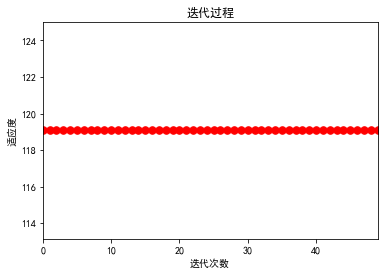

In [41]:
#         第一次调整

# FY00,FY01,FY02发射信号

data3 = data1_

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']


class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[3] = [19+x1,110+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()



In [42]:
data3

[[0.0, 0.0],
 [100.0, 0.0],
 [77.63150977221504, 64.24723046592227],
 [20, 112],
 [-60.0, 99.0],
 [-84.0, 25.0],
 [-113.0, -46.0],
 [-60.4, -99.0],
 [9.0, -88.5],
 [94.0, -79.6]]

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：109.61967958902619
当前最佳位置：[1 2 3

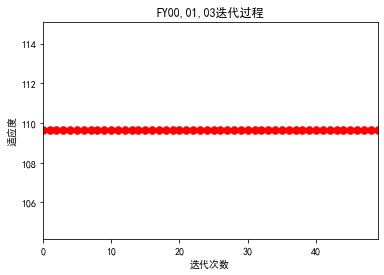

In [43]:
# FY00,FY01,FY03发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[4] = [-52+x1,91+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,03迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.12730991405644
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：99.127

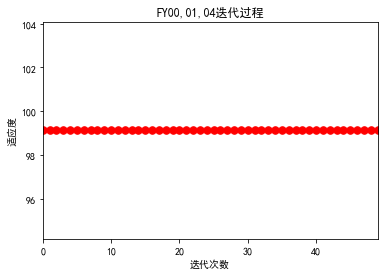

In [44]:
# FY00,FY01,FY04发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[5] = [-92+x1,33+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,04迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.92681409833466
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：86.926

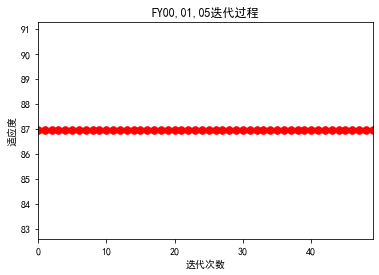

In [45]:
# FY00,FY01,FY05发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[6] = [-105+x1,-38+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,05迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.52111254082547
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：73.521

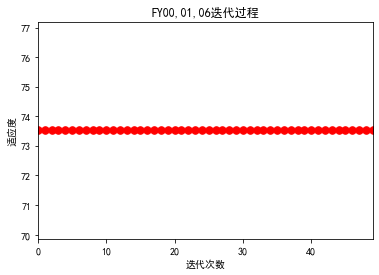

In [46]:
# FY00,FY01,FY06发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[7] = [-52.4+x1,-91+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,06迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.52972399640775
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.529

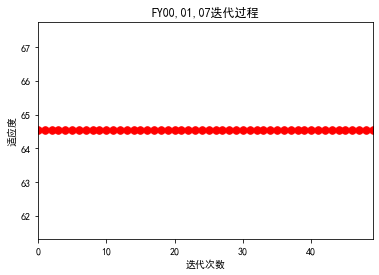

In [47]:
# FY00,FY01,FY07发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[8] = [17+x1,-96.5+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,07迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.02732542503103
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.027

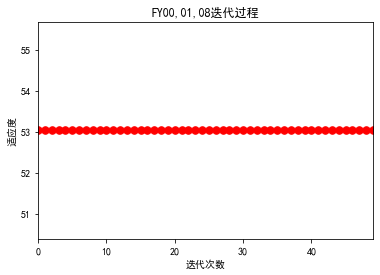

In [48]:
# FY00,FY01,FY08发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[9] = [86+x1,-71.6+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,08迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.94080673231077
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：52.940

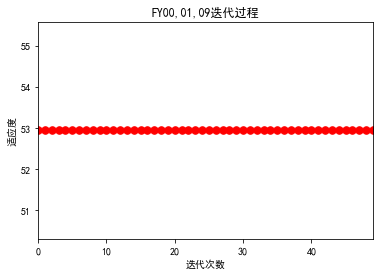

In [49]:
# FY00,FY01,FY09发射信号
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data3[2] = [75+x1,63+x2]
        y = calc_all_distance(data3)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

In [50]:

pp = []
for i in data3:
    x = func_2(i)
    pp.append(x)
    
print(data3)
pp

[[0.0, 0.0], [100.0, 0.0], [76, 65], [20, 112], [-51, 93], [-91, 35], [-104, -36], [-51.4, -89], [18, -94.5], [87, -69.6]]
[[0.0, 0.0], [100.0, 0.0], [76, 65], [20, 112], [-51, 93], [-91, 35], [-104, -36], [-51.4, -89], [18, -94.5], [87, -69.6]]


[[0.0, 0.0],
 [100.0, 0.0],
 [100.00499987500625, 40.539151741483444],
 [113.77170122662314, 79.8753283446022],
 [106.06601717798213, 118.73979529168805],
 [97.49871794028884, 158.96248897457818],
 [110.05453193758083, 199.0934920004856],
 [102.77626185068223, 239.9923593067384],
 [96.19901246894378, 280.7842978675626],
 [111.41436173133157, 321.3401917459099]]

当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.20654876 3.36795452]
当前的最佳适应度：51.70275323800741
当前最佳位置：[0.2065

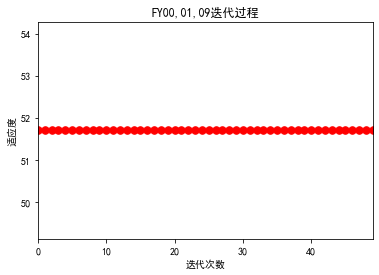

In [51]:
data4 = data3
class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[7] = [-51.4+x1,-89+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO(dimension, time, size, low, up, v_low, v_high)

pso.pso()

In [52]:
print(data4[7])
func_2(data4[7])

[-51.19345123830303, -85.6320454753754]


[99.76781375767072, 239.12772904348492]

In [73]:
data4 = [[0.0, 0.0], [100.0, 0.0], [76, 65], [20, 112], [-51, 93], [-91, 35], [-104, -36], [-51.2, -85.6], [18, -94.5], [87, -69.6]]
data4

[[0.0, 0.0],
 [100.0, 0.0],
 [76, 65],
 [20, 112],
 [-51, 93],
 [-91, 35],
 [-104, -36],
 [-51.2, -85.6],
 [18, -94.5],
 [87, -69.6]]

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：53.536996268039736
当前最佳位置：[1 2 3

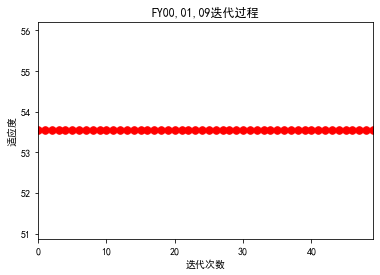

In [75]:
#        第二次调整


class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[2] = [76+x1,65+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.70262693242065
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：55.702

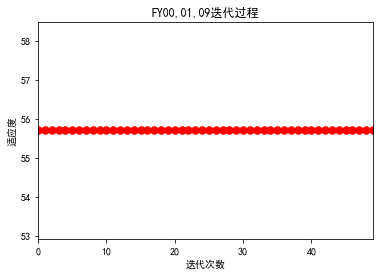

In [76]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[3] = [20+x1,112+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.62494257029262
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：57.624

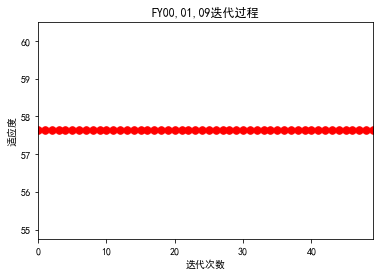

In [77]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[4] = [-51+x1,93+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.40663279706374
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：59.406

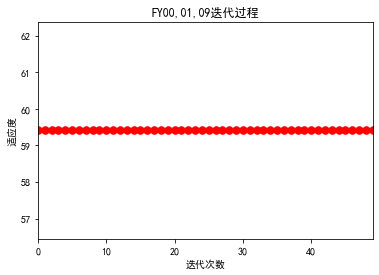

In [78]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[5] = [-91+x1,35+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.24902368124339
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：58.249

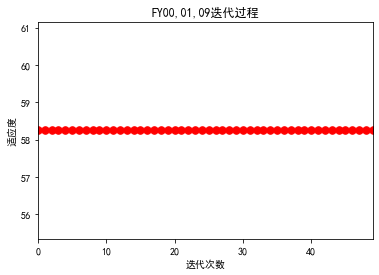

In [79]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[6] = [-104+x1,-36+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.41817305510117
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.418

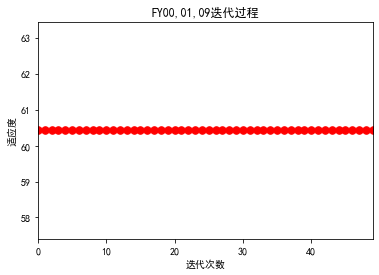

In [80]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[8] = [18+x1,-94.5+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：60.609533471751334
当前最佳位置：[1 2 3

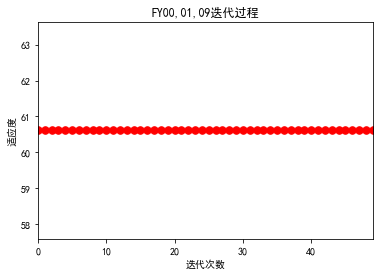

In [81]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[9] = [87+x1,-69.6+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.76982066513436
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：64.769

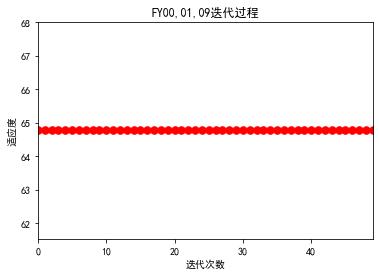

In [106]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[4] = [-49+x1,97+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3 4 5]
当前的最佳适应度：132.19350523184548
当前最佳位置：[1 2 3

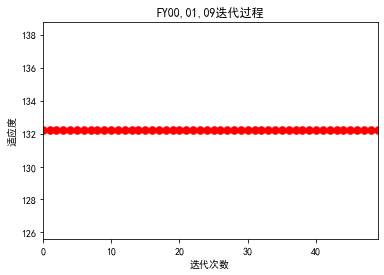

In [114]:
class PSO_:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # 变量个数
        self.time = time  # 迭代的代数
        self.size = size  # 种群大小
        self.bound = []  # 变量的约束范围
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # 所有粒子的位置
        self.v = np.zeros((self.size, self.dimension))  # 所有粒子的速度
        self.p_best = np.zeros((self.size, self.dimension))  # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.dimension))[0]  # 全局最优的位置

        # 初始化第0代初始全局最优解
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            # 做出修改
            if fit < temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, x):
        """
        个体适应值计算
        """
        x1 = x[0]
        x2 = x[1]
        data4[5] = [-89.9+x1,-39.9+x2]
        y = calc_all_distance(data4)
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # 学习因子
        c2 = 2.0
        w = 0.8  # 自身权重因子
        for i in range(size):
            # 更新速度(核心公式)
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # 速度限制
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) < self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) < self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            print('当前最佳位置：{}'.format(self.final_best))
            temp = self.fitness(self.final_best)
            print('当前的最佳适应度：{}'.format(temp))
            best.append(temp)
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel(u"迭代次数")  # X轴标签
        plt.ylabel(u"适应度")  # Y轴标签
        plt.title(u"FY00,01,09迭代过程")  # 标题
        plt.show()


            


time = 50
size = 100
dimension = 2
v_low = -1
v_high = 1
low = [-8,-8]
up = [8,8]
pso = PSO_(dimension, time, size, low, up, v_low, v_high)

pso.pso()

In [117]:
data4

[[0.0, 0.0],
 [100.0, 0.0],
 [77, 67],
 [21, 114],
 [-48, 99],
 [-88.9, -37.9],
 [-103, -34],
 [-51.2, -85.6],
 [19, -92.5],
 [88, -67.6]]

In [127]:
data4

[[0.0, 0.0],
 [100.0, 0.0],
 [77, 67],
 [21, 114],
 [-48, 99],
 [-94, 33],
 [-94.2, -37.4],
 [-51.2, -85.6],
 [15.2, -100.415],
 [88, -67.6]]

In [128]:
pp_ = []
for i in data4:
    x = func_2(i)
    pp_.append(x)
    
pp_

[[0.0, 0.0],
 [100.0, 0.0],
 [102.06860437960343, 41.02750405924934],
 [115.91807451816995, 79.56252464888183],
 [110.02272492535349, 115.86635679409453],
 [99.62429422585637, 160.65567072787886],
 [101.35284899794382, 201.65444371977483],
 [99.74367147844518, 239.1150546692714],
 [101.55891012117057, 278.60761929215744],
 [110.9673825950671, 322.46918540273975]]

In [38]:
func_2(data4[2])

[100.76883413067182, 39.61089138251844]

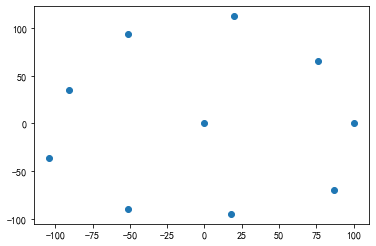

In [132]:
plot_location(data3)

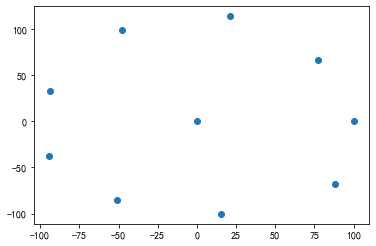

In [130]:
plot_location(data4)
    

In [138]:
m = []
n = []
for i in range(9):
    m.append(data3[i+1][0])
    n.append(data3[i+1][1])

0 0

方法                             Xc         Yc         Rc   nb_calls    std(Ri)     residu    residu2
---------------------------------------------------------------------------------------------------
Fitting Circle           -0.21851    1.92694  104.19357         12   5.876712 310.821715 13714781.72


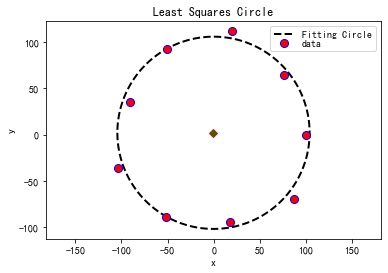

In [139]:
method_2  = "Fitting Circle"
x = m
y = n
basename = 'arc'

# 质心坐标
x_m = 0
y_m = 0

print(x_m,y_m)

def countcalls(fn):    #修饰器：用于输出反馈
    "decorator function count function calls "

    @functools.wraps(fn)
    def wrapped(*args):
        wrapped.ncalls +=1
        return fn(*args)

    wrapped.ncalls = 0
    return wrapped

def calc_R(xc, yc):

    return sqrt((x - xc) ** 2 + (y - yc) ** 2)

def f_2(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

#  估计圆心
center_estimate = x_m, y_m
center_2, _ = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(xc_2, yc_2)
#  拟合圆的半径
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)
residu2_2  = sum((Ri_2**2-R_2**2)**2)
ncalls_2   = f_2.ncalls

#  输出
fmt = '%-22s %10.5f %10.5f %10.5f %10d %10.6f %10.6f %10.2f'
print (('\n%-22s' +' %10s'*7) % tuple('方法 Xc Yc Rc nb_calls std(Ri) residu residu2'.split()))
print('-'*(22 +7*(10+1)))
print(fmt % (method_2 , xc_2 , yc_2 , R_2 , ncalls_2 , Ri_2.std() , residu_2 , residu2_2 ))

#  画图
p.close('all')

def plot_all(residu2=False):

    p.figure(facecolor='white')  # figsize=(7, 5.4), dpi=72,
    p.axis('equal')

    theta_fit = linspace(-pi, pi, 180)

    x_fit2 = xc_2 + R_2 * cos(theta_fit)
    y_fit2 = yc_2 + R_2 * sin(theta_fit)
    p.plot(x_fit2, y_fit2, 'k--', label=method_2, lw=2)

    p.plot([xc_2], [yc_2], 'gD', mec='r', mew=1)

    
    p.xlabel('x')  # 添加x轴标签
    p.ylabel('y')  # 添加y轴标签


    p.plot(x, y, 'ro', label='data', ms=8, mec='b', mew=1) # 加入数据
    p.legend(loc='best', labelspacing=0.1)

    p.title('Least Squares Circle')   # 添加标题

    p.savefig('%s_residu%d.png' % (basename, 2 if residu2 else 1)) # 相对路径保存并添加名字

# plot_all(residu2=False)
plot_all(residu2=True )

p.show()

0 0

方法                             Xc         Yc         Rc   nb_calls    std(Ri)     residu    residu2
---------------------------------------------------------------------------------------------------
Fitting Circle            1.61398    3.80725  104.59483         15   4.892374 215.417905 9543215.72


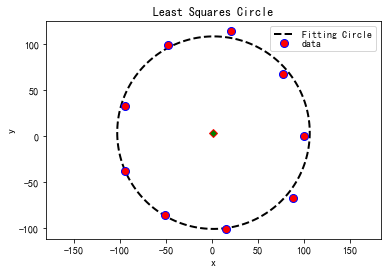

In [140]:
method_2 = 'Fitting Circle'
m = []
n = []
for i in range(9):
    m.append(data4[i+1][0])
    n.append(data4[i+1][1])


x = m
y = n
basename = 'arc'

# 质心坐标
x_m = 0
y_m = 0

print(x_m,y_m)

def countcalls(fn):    #修饰器：用于输出反馈
    "decorator function count function calls "

    @functools.wraps(fn)
    def wrapped(*args):
        wrapped.ncalls +=1
        return fn(*args)

    wrapped.ncalls = 0
    return wrapped

def calc_R(xc, yc):

    return sqrt((x - xc) ** 2 + (y - yc) ** 2)

def f_2(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

#  估计圆心
center_estimate = x_m, y_m
center_2, _ = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(xc_2, yc_2)
#  拟合圆的半径
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)
residu2_2  = sum((Ri_2**2-R_2**2)**2)
ncalls_2   = f_2.ncalls

#  输出
fmt = '%-22s %10.5f %10.5f %10.5f %10d %10.6f %10.6f %10.2f'
print (('\n%-22s' +' %10s'*7) % tuple('方法 Xc Yc Rc nb_calls std(Ri) residu residu2'.split()))
print('-'*(22 +7*(10+1)))
print(fmt % (method_2 , xc_2 , yc_2 , R_2 , ncalls_2 , Ri_2.std() , residu_2 , residu2_2 ))

#  画图
p.close('all')

def plot_all(residu2=False):

    p.figure(facecolor='white')  # figsize=(7, 5.4), dpi=72,
    p.axis('equal')

    theta_fit = linspace(-pi, pi, 180)

    x_fit2 = xc_2 + R_2 * cos(theta_fit)
    y_fit2 = yc_2 + R_2 * sin(theta_fit)
    p.plot(x_fit2, y_fit2, 'k--', label=method_2, lw=2)

    p.plot([xc_2], [yc_2], 'gD', mec='r', mew=1)

    
    p.xlabel('x')  # 添加x轴标签
    p.ylabel('y')  # 添加y轴标签


    p.plot(x, y, 'ro', label='data', ms=8, mec='b', mew=1) # 加入数据
    p.legend(loc='best', labelspacing=0.1)

    p.title('Least Squares Circle')   # 添加标题

    p.savefig('%s_residu%d.png' % (basename, 2 if residu2 else 1)) # 相对路径保存并添加名字

# plot_all(residu2=False)
plot_all(residu2=True )

p.show()

In [ ]:
        data4[5] = [-89.9+x1,-39.9+x2]
        y = calc_all_distance(data4)


import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm  
from mpl_toolkits.mplot3d import Axes3D

dnasize = 24
popsize = 200
crossover_rate = 0.8
mutation_rate = 0.005
n_generations = 50
x_bound = [-3,-3]
y_bound = [-3,-3]

def f(a,b):
    return

def plot_3d(ax):
    
    X = np.linspace(*x_bound,100)
    Y = np.linspace(*y_bound,100)
    X,Y = np.meshgridh(X,Y)
    Z = F(X,Y)
    ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
    ax.set_zlim(-10,10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()
    
def get_fitness(pop):
    x,y = translateDNA(pop)
    pred = F(x,y)
    return (pred - np.min(pred)) + 0.001

def translateDNA(pop):
    x_pop = pop[:,1::2]
    y_pop = pop[:,::2] 
    
    x = x_pop.dot(2**np.arange(dnasize)[::-1])/float(2**dnasize-1)*(x_bound[1]-x_bound[0])+x_bound[0]
    y = y_pop.dot(2**np.arange(dnasize)[::-1])/float(2**dnasize-1)*(y_bound[1]-y_bound[0])+y_bound[0]
    return x,y




In [141]:
data4

[[0.0, 0.0],
 [100.0, 0.0],
 [77, 67],
 [21, 114],
 [-48, 99],
 [-94, 33],
 [-94.2, -37.4],
 [-51.2, -85.6],
 [15.2, -100.415],
 [88, -67.6]]

In [143]:
mn = []
for i in data4:
    u = func_2(i)
    mn.append(u)
    
mn


[[0.0, 0.0],
 [100.0, 0.0],
 [102.06860437960343, 41.02750405924934],
 [115.91807451816995, 79.56252464888183],
 [110.02272492535349, 115.86635679409453],
 [99.62429422585637, 160.65567072787886],
 [101.35284899794382, 201.65444371977483],
 [99.74367147844518, 239.1150546692714],
 [101.55891012117057, 278.60761929215744],
 [110.9673825950671, 322.46918540273975]]

In [20]:
a = 1
def abs():
    a=3
abs
a

1

In [ ]:

plot_location(data1_)